<a href="https://colab.research.google.com/github/pastoril10/Um_pouco_sobre_ScikitLearn/blob/main/Um_pouco_sobre_ScikitLearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando a biblioteca

In [1]:
import sklearn

# Base de dados

## Base de dados sobre diabetes

In [3]:
import pandas as pd

diabetes = pd.read_csv("diabetes.csv")

## Base de dados sobre batimentos cardiacos

In [4]:
batimentos = pd.read_csv("batimentos cardiacos.csv")

## Base de dados sobre colesterol

In [5]:
colesterol = pd.read_csv("colesterol.csv")

# Separando os dados em dados de treino e teste - usando train_test_split

In [6]:
from sklearn.model_selection import train_test_split

#x_treino, x_test, y_treino, y_test = train_test_split(x, y)

#Diabetes - Problema de Classificação

In [7]:
diabetes.head()

,quantidade_gravidez,concentracao_glicose,pressao,espessura_triceps,insulina,imc,diabetes_pedigree,idade,resultado
0,6,148,72,35,0,33.6,0.627,50,testado_positivo
1,1,85,66,29,0,26.6,0.351,31,testado_negativo
2,8,183,64,0,0,23.3,0.672,32,testado_positivo
3,1,89,66,23,94,28.1,0.167,21,testado_negativo
4,0,137,40,35,168,43.1,2.288,33,testado_positivo


In [8]:
x = diabetes.drop("resultado", axis =1)

In [9]:
y = diabetes["resultado"]

In [10]:
#mantendo o defoult de 75% para treino e 25% para teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y)

## Ensinando o computador!!!

In [11]:
#definindo um numero aleatório
seed = 4121988

### Usando o modelo de arvore de decisão

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
clf_arvore = DecisionTreeClassifier(random_state = seed, max_depth = 3)
#profundidade máxima da arvore max_depth = 3

 Ensinando o computador com os dados de treino

In [14]:
clf_arvore.fit(x_treino, y_treino)

DecisionTreeClassifier(max_depth=3, random_state=4121988)

In [15]:
#verificando a acurácia
clf_arvore.score(x_teste, y_teste)

0.71875

Verificando a arvore de decisão

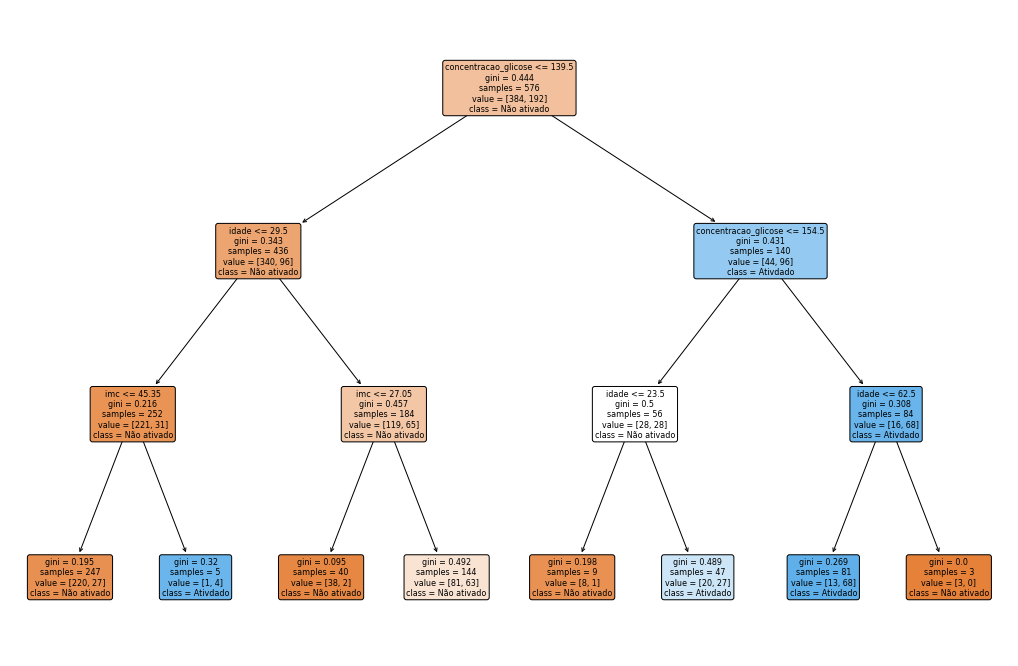

In [25]:
from sklearn import tree
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (18,12))
tree.plot_tree(clf_arvore,
               ax = ax,
               fontsize = 8,
               rounded = True,
               filled = True,
               feature_names= x_treino.columns,
               class_names=["Não ativado", "Ativdado"])

plt.show()

### Usando o modelo Dummy

In [26]:
from sklearn.dummy import DummyClassifier

In [27]:
clf_dummy = DummyClassifier(strategy="most_frequent")

 Ensinando o computador com os dados de treino

In [28]:
clf_dummy.fit(x_treino, y_treino)

DummyClassifier(strategy='most_frequent')

In [29]:
#verificando a acurácia
clf_dummy.score(x_teste, y_teste)

0.6041666666666666

# Batimentos cardiacos - Problema de regressão Linear

In [30]:
batimentos.head()

,Idade,Peso,Horas de atividade,Batimentos cardiacos
0,44.247295,53.591343,3.397836,82.307425
1,81.427930,172.569375,33.142344,179.045377
2,50.807130,74.582817,8.645704,103.522796
3,55.778712,90.491878,12.622969,114.239779
4,53.790400,84.129280,11.032320,107.184063


In [32]:
x = batimentos.drop("Batimentos cardiacos", axis =1)

In [33]:
y = batimentos["Batimentos cardiacos"]

In [37]:
seed = 4500

In [38]:
#mantendo o defoult de 75% para treino e 25% para teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, random_state = seed)

## Ensinando o computador!!

### Importando o modelo de regressão linear

In [39]:
from sklearn import linear_model

In [40]:
rgs = linear_model.LinearRegression(fit_intercept = False, normalize=True)

In [41]:
rgs.fit(x_treino, y_treino)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


LinearRegression(fit_intercept=False, normalize=True)

In [42]:
rgs.score(x_teste, y_teste)

0.9872272899997122

# Colesterol - Problema de Clusterização 

In [43]:
colesterol.head()

,idade,genero,tipo_dor_peito,pressao_sanguinea_repouso,acucar_jejum,resultado_eletrocardio,freq_cardio_max,angina_exercicio,depressao_induzida_exercicio,inclinacao,num_princ_vasos,thal,diag_doenca_cardiaca,colesterol
0,63,1,1,145,1,2,150,0,2.3,3,0,6,0,233
1,67,1,4,160,0,2,108,1,1.5,2,3,3,2,286
2,67,1,4,120,0,2,129,1,2.6,2,2,7,1,229
3,37,1,3,130,0,0,187,0,3.5,3,0,3,0,250
4,41,0,2,130,0,2,172,0,1.4,1,0,3,0,204


In [44]:
from sklearn.cluster import KMeans

In [47]:
kmeans = KMeans(n_clusters = 2, random_state = 9)

In [49]:
colesterol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   idade                         303 non-null    int64  
 1   genero                        303 non-null    int64  
 2   tipo_dor_peito                303 non-null    int64  
 3   pressao_sanguinea_repouso     303 non-null    int64  
 4   acucar_jejum                  303 non-null    int64  
 5   resultado_eletrocardio        303 non-null    int64  
 6   freq_cardio_max               303 non-null    int64  
 7   angina_exercicio              303 non-null    int64  
 8   depressao_induzida_exercicio  303 non-null    float64
 9   inclinacao                    303 non-null    int64  
 10  num_princ_vasos               303 non-null    object 
 11  thal                          303 non-null    object 
 12  diag_doenca_cardiaca          303 non-null    int64  
 13  coles

In [51]:
x = colesterol.select_dtypes("int64")

In [52]:
kmeans.fit(x)

KMeans(n_clusters=2, random_state=9)

In [53]:
kmeans.labels_

array([1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,

In [54]:
import seaborn as sns

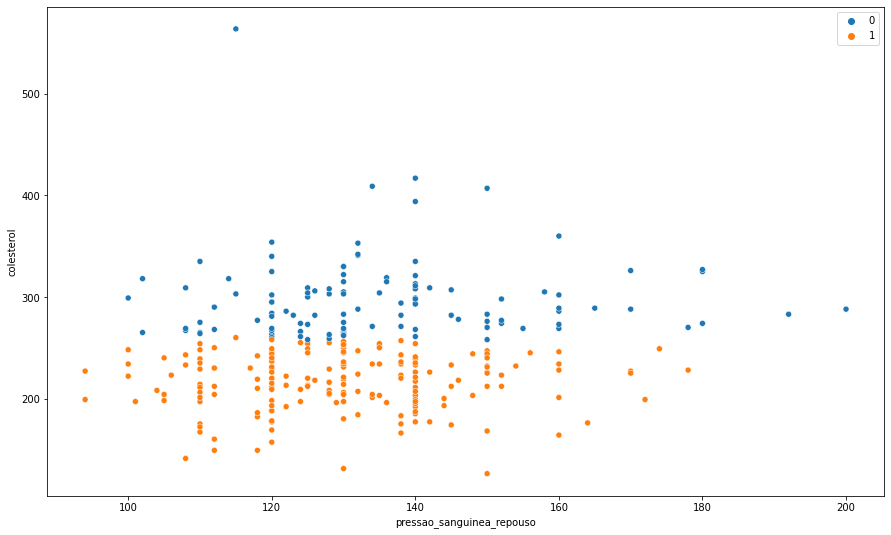

In [57]:
plt.figure(figsize = (15,9))
sns.scatterplot(data = colesterol,
                x = "pressao_sanguinea_repouso", 
                y="colesterol",
                hue = kmeans.labels_)


In [58]:
colesterol["clusters"] = kmeans.labels_
colesterol.head()

,idade,genero,tipo_dor_peito,pressao_sanguinea_repouso,acucar_jejum,resultado_eletrocardio,freq_cardio_max,angina_exercicio,depressao_induzida_exercicio,inclinacao,num_princ_vasos,thal,diag_doenca_cardiaca,colesterol,clusters
0,63,1,1,145,1,2,150,0,2.3,3,0,6,0,233,1
1,67,1,4,160,0,2,108,1,1.5,2,3,3,2,286,0
2,67,1,4,120,0,2,129,1,2.6,2,2,7,1,229,1
3,37,1,3,130,0,0,187,0,3.5,3,0,3,0,250,1
4,41,0,2,130,0,2,172,0,1.4,1,0,3,0,204,1


In [60]:
colesterol.groupby("clusters")["colesterol"].mean()

clusters
0    298.963964
1    216.473958
Name: colesterol, dtype: float64